In [32]:
# prompt: import pandas library , numpy library and also import iris dataset from sklearn and  classify that in dependent and independent variable

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Separate the data into independent and dependent variables
X = iris.data
y = iris.target



In [33]:
# prompt: convert X and y to dataframe

import pandas as pd
X = pd.DataFrame(X, columns=iris.feature_names)
y = pd.DataFrame(y, columns=["species"])


In [34]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [36]:
# prompt: split the X and y in train and test dataset , size of test data should 0.3

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_test

what does ensemnle do ??

it do something like , use many models on same data to predict and if problem is classification type then it gives majority as output and if problem data is regressor type then it returns the average


In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

<ipython-input-37-dfd7da388b96>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier()

In [38]:
classifier.score(X_test,y_test)

1.0

Bagging :- It split the data in parrlel nature like let suppose it split data into 5 parts and train that on diffrent models or same model.

Boosting :- it take d1 from D and the make new d2 from wrongness of d1 and this process go till and it make diffrent models

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
classifier1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=100)

In [41]:
classifier1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [42]:
classifier1.score(X_test,y_test)

1.0

Soft Voting :- it return the probability of all classes

Hard Voting :- It return the class that containing the high probability

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [44]:
estimators = [
    ('m1',RandomForestClassifier(n_estimators=5)),
    ('m2',SVC(probability=True)),
    ('m3',KNeighborsClassifier(n_neighbors=3)),
    ('m4',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=5)),
    ('m5',LogisticRegression())
]


In [45]:
final = VotingClassifier(estimators=estimators, voting='hard')

In [46]:
final.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('m1', RandomForestClassifier(n_estimators=5)),
                             ('m2', SVC(probability=True)),
                             ('m3', KNeighborsClassifier(n_neighbors=3)),
                             ('m4',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=5)),
                             ('m5', LogisticRegression())])

In [47]:
for m in (final.estimators_):
    print (m.score(X_test,y_test))


1.0
1.0
1.0
1.0
1.0


In [48]:
final.score(X_test,y_test)

1.0

In [49]:
estimators = [
    ('m1',RandomForestClassifier(n_estimators=5)),
    ('m2',SVC(probability=True)),
    ('m3',KNeighborsClassifier(n_neighbors=3)),
    ('m4',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=5)),
    ('m5',LogisticRegression())
]

In [50]:
final = VotingClassifier(estimators=estimators, voting='soft')
final.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('m1', RandomForestClassifier(n_estimators=5)),
                             ('m2', SVC(probability=True)),
                             ('m3', KNeighborsClassifier(n_neighbors=3)),
                             ('m4',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=5)),
                             ('m5', LogisticRegression())],
                 voting='soft')

In [51]:
for m in (final.estimators_):
    print(m.score(X_test,y_test))

1.0
1.0
1.0
1.0
1.0


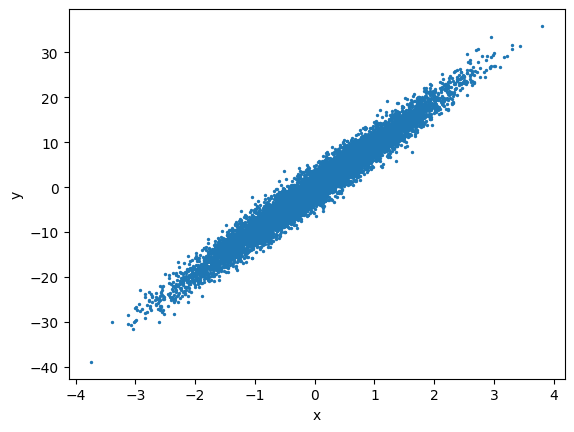

In [52]:
from sklearn.datasets import make_regression
x,y = make_regression(n_features=1, noise=2, n_samples=10000,random_state=0)
import matplotlib.pyplot as plt
plt.scatter(x,y,s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [53]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(x, y)

RandomForestRegressor()

In [54]:
reg.score(x, y)

0.9911485599608525